

**TASK-1: Get Dataset & Load It**



In [ ]:
import pandas as pd

# Load dataset (already downloaded from Kaggle)
df = pd.read_csv("Cricket_Player_Performance_Final.csv", parse_dates=["date"])

print("Dataset Loaded Successfully!")

print("Shape:", df.shape) #the dataset size — how many rows and columns it contains.
print("Column Names:\n", df.columns.tolist()) # tolist means It converts the column names of the DataFrame into a list format

print("\nFirst 5 Rows:")
print(df.head())


Dataset Loaded Successfully!
Shape: (19536, 22)
Column Names:
 ['match_id', 'season', 'date', 'venue', 'player_name', 'player_role', 'runs', 'balls', 'fours', 'sixes', 'strike_rate', 'overs', 'balls_bowled', 'runs_conceded', 'wickets', 'economy', 'last_5_avg_runs', 'last_10_avg_runs', 'career_avg_runs', 'matches_played_to_date', 'form_index', 'fantasy_score']

First 5 Rows:
   match_id  season       date           venue player_name player_role  runs  \
0         1    2008 2008-05-19  Sawai Mansingh   Player_96     Batsman    13   
1         1    2008 2008-05-19  Sawai Mansingh   Player_16      Bowler    11   
2         1    2008 2008-05-19  Sawai Mansingh   Player_31  Allrounder     0   
3         1    2008 2008-05-19  Sawai Mansingh  Player_159     Batsman    13   
4         1    2008 2008-05-19  Sawai Mansingh  Player_129  Allrounder    13   

   balls  fours  sixes  ...  balls_bowled  runs_conceded  wickets  economy  \
0     21      0      2  ...             0              0        

**TASK-2: Cleaning, Normalization, Outlier Handling, Date Format Check & Analysis**

This includes:

 Missing values
 Data types
 Outlier detection
 Normalization
 Checking date formats
 Cleaned dataset creation

In [ ]:
import numpy as np

print("\n--- DATA TYPES ---")
print(df.dtypes)

# 1. Convert numerical columns
numeric_cols = [
    'runs','balls','fours','sixes','strike_rate','overs','balls_bowled',
    'runs_conceded','wickets','economy','last_5_avg_runs','last_10_avg_runs',
    'career_avg_runs','matches_played_to_date','form_index','fantasy_score'
]

for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 2. Missing Value Check
print("\n--- MISSING VALUES ---")
print(df.isna().sum())

# Remove rows missing target (runs)
df = df.dropna(subset=['runs']).reset_index(drop=True)

# Impute remaining numeric missing values with Median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute Categorical missing with 'missing'
df[['venue','player_role']] = df[['venue','player_role']].fillna("missing")

# 3. Check Date Format
print("\nDate column type:", type(df['date'][0]))

# 4. Duplicate Record Check
duplicates = df.duplicated().sum()
print("\nDuplicates Found:", duplicates)

# 5. Outlier Detection (IQR Method)
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers: {len(outliers)}")

outlier_columns = ['runs','balls','strike_rate','economy','wickets']

print("\n--- OUTLIER REPORT ---")
for col in outlier_columns:
    detect_outliers(col)

# 6. Normalization (only numeric features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

print("\nNORMALIZED DATA SAMPLE")
print(scaled_df.head())

print("\nTASK2 Completed Successfully!")



--- DATA TYPES ---
match_id                           int64
season                             int64
date                      datetime64[ns]
venue                             object
player_name                       object
player_role                       object
runs                               int64
balls                              int64
fours                              int64
sixes                              int64
strike_rate                      float64
overs                              int64
balls_bowled                       int64
runs_conceded                      int64
wickets                            int64
economy                          float64
last_5_avg_runs                  float64
last_10_avg_runs                 float64
career_avg_runs                  float64
matches_played_to_date             int64
form_index                       float64
fantasy_score                      int64
dtype: object

--- MISSING VALUES ---
match_id                  0
season      

**TASK-3: EDA  Distribution of Runs, Wickets, Venue Stats, Team Performance**

EDA includes:

 Distribution plots
 Relationship analysis
 Venue-wise performance
 Role-wise performance

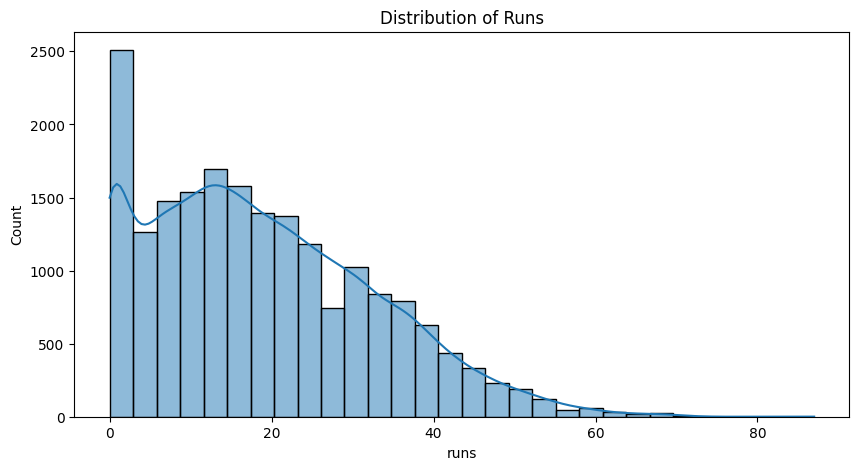

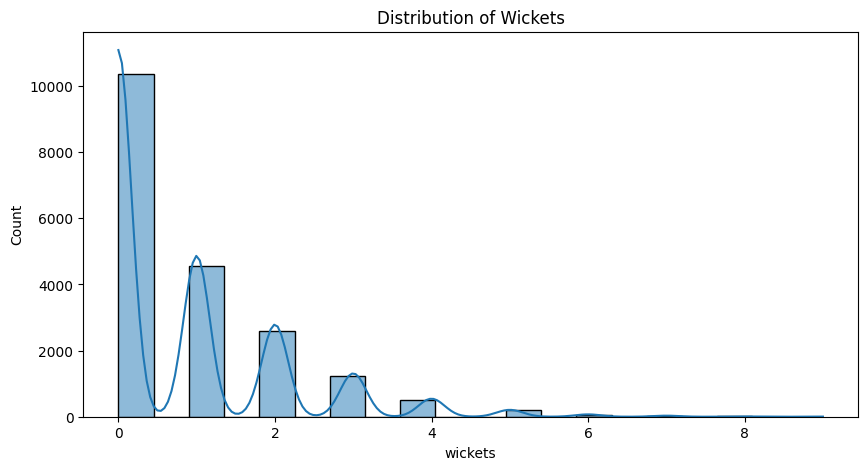

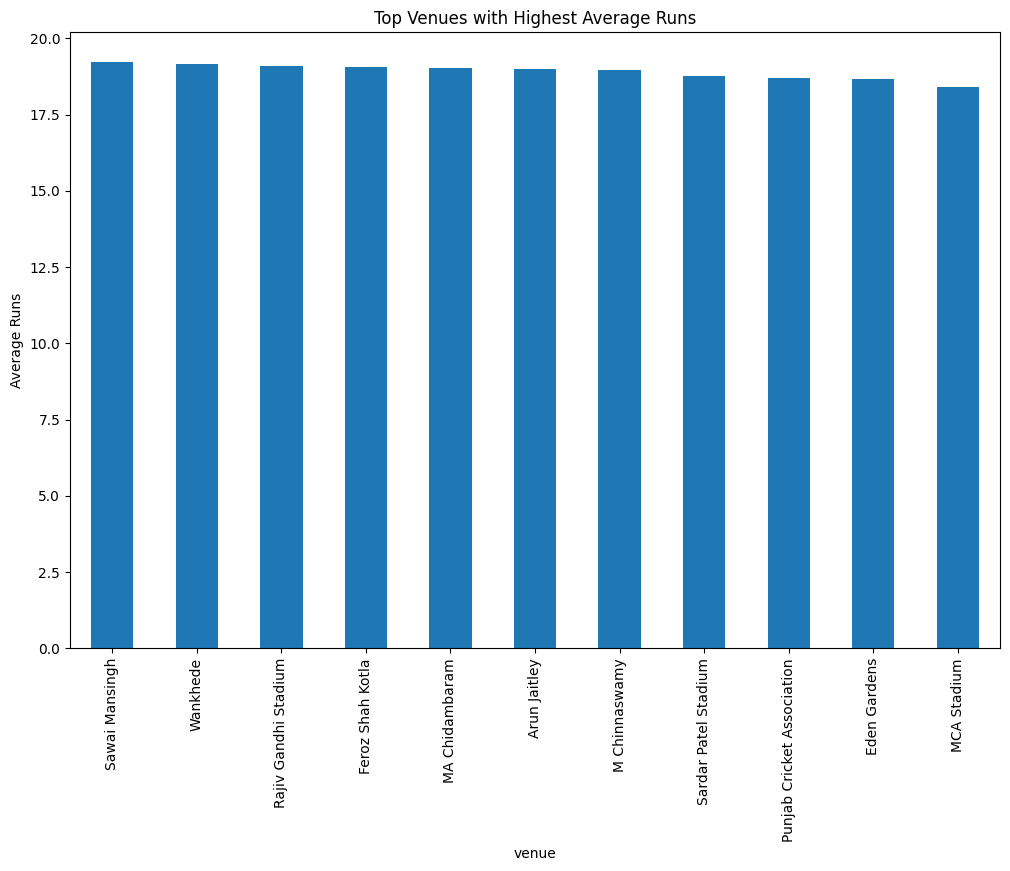

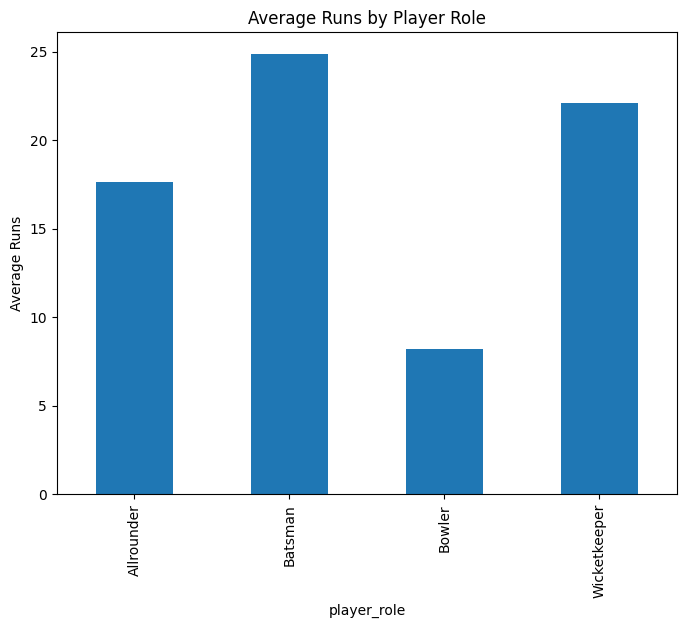

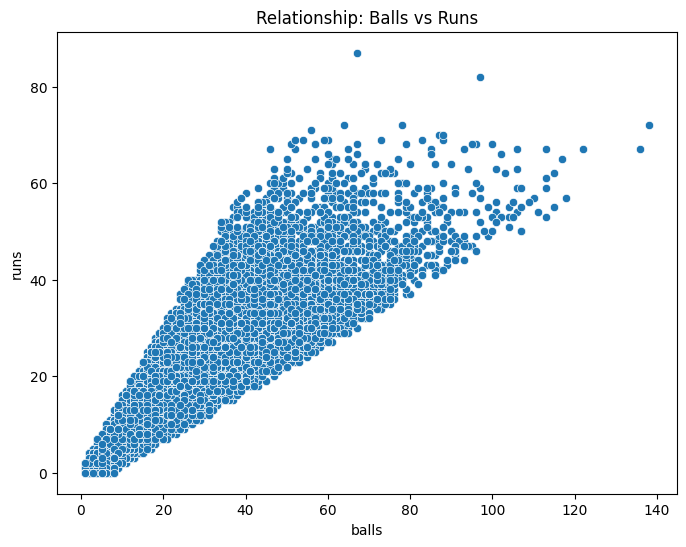

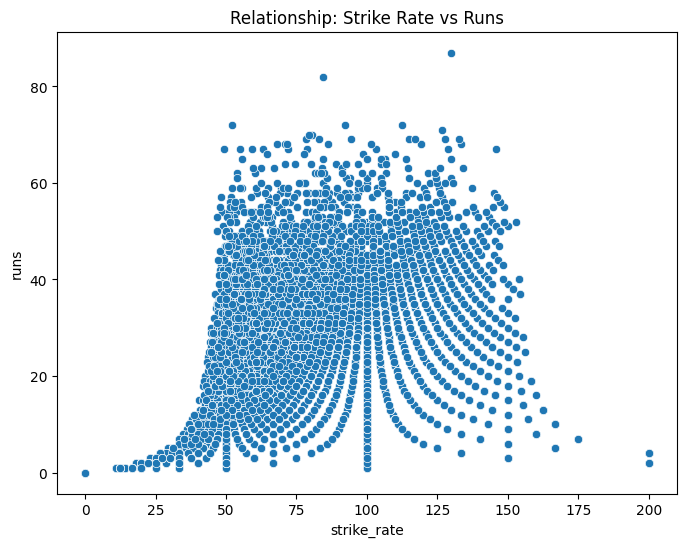


EDA Completed for Runs, Wickets, Venue, Player Role!


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# RUNS DISTRIBUTION
plt.figure(figsize=(10,5))
sns.histplot(df['runs'], bins=30, kde=True)
plt.title("Distribution of Runs")
plt.show()

# WICKETS DISTRIBUTION
plt.figure(figsize=(10,5))
sns.histplot(df['wickets'], bins=20, kde=True)
plt.title("Distribution of Wickets")
plt.show()

#  VENUE-WISE AVERAGE RUNS
venue_runs = df.groupby('venue')['runs'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
venue_runs.head(15).plot(kind='bar')
plt.title("Top Venues with Highest Average Runs")
plt.ylabel("Average Runs")
plt.show()

# PLAYER ROLE PERFORMANCE
role_runs = df.groupby('player_role')['runs'].mean()

plt.figure(figsize=(8,6))
role_runs.plot(kind='bar')
plt.title("Average Runs by Player Role")
plt.ylabel("Average Runs")
plt.show()

# RUNS vs BALLS
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='balls', y='runs')
plt.title("Relationship: Balls vs Runs")
plt.show()

# RUNS vs STRIKE RATE
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='strike_rate', y='runs')
plt.title("Relationship: Strike Rate vs Runs")
plt.show()

print("\nEDA Completed for Runs, Wickets, Venue, Player Role!")
